# Objective : Loan Prediction

# Exploratory Data Analysis (EDA) - Python

# Insights - Patterns

# Classification (Using the ML)


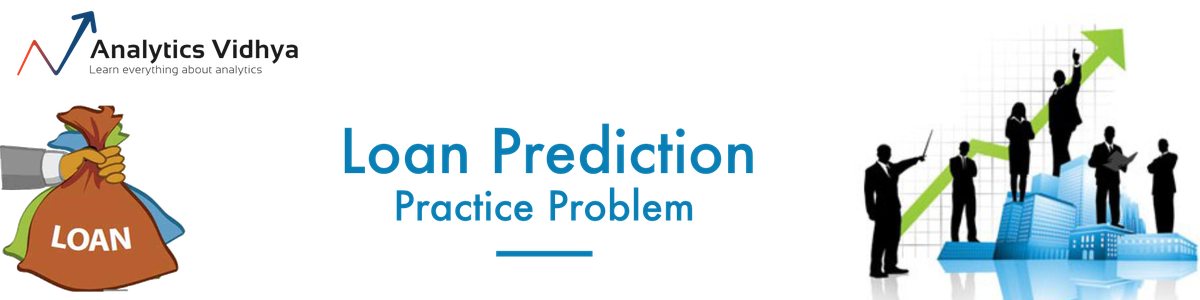

# 1. Load Python Modules

In [66]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

from scipy import stats


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# 2. Read the Dataset from CSV file  - Using Pandas

In [67]:
file_path=r"loan_train_dataset.csv"
loan_df=pd.read_csv(file_path)
loan_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### 2.1 Non-Significant columns - we need to drop here.

In [68]:
#drop - sensitive - non imp columns for data analysis 
print(loan_df["Loan_ID"].nunique())
loan_df.drop("Loan_ID",axis=1,inplace=True)
print(loan_df.columns)

614
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


# 3. Basic Inspection on given dataset

In [69]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print()
    print("table summary ")
    print(table.describe())

basic_inspection_dataset(loan_df)

top 5 rows - using head
  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2       

In [70]:
# convertinh Credit_History column as categorical column - based on the previous experiments
loan_df["Credit_History"]=loan_df["Credit_History"].map(lambda x: 'N' if x==0 else 'Y')

# 4. Handling Missing Values - Cat - Variables

In [71]:
def print_cat_values(cat_var):
    print("We are studying about varailbe/column/feature :", cat_var)
    print("categories:",loan_df[cat_var].unique())
    print("num of categories:",loan_df[cat_var].nunique())
    print("Value-counts:", loan_df[cat_var].value_counts())  

In [72]:
cat_vars = loan_df.select_dtypes(include="object").columns
print(cat_vars) ### selct the missing values - cat -vars
cat_vars = ['Gender', 'Married', 'Dependents', 'Self_Employed','Credit_History']

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [73]:
for var in cat_vars:
    print_cat_values(var)
    print("=========================================")
    print()

We are studying about varailbe/column/feature : Gender
categories: ['Male' 'Female' nan]
num of categories: 2
Value-counts: Gender
Male      489
Female    112
Name: count, dtype: int64

We are studying about varailbe/column/feature : Married
categories: ['No' 'Yes' nan]
num of categories: 2
Value-counts: Married
Yes    398
No     213
Name: count, dtype: int64

We are studying about varailbe/column/feature : Dependents
categories: ['0' '1' '2' '3+' nan]
num of categories: 4
Value-counts: Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

We are studying about varailbe/column/feature : Self_Employed
categories: ['No' 'Yes' nan]
num of categories: 2
Value-counts: Self_Employed
No     500
Yes     82
Name: count, dtype: int64

We are studying about varailbe/column/feature : Credit_History
categories: ['Y' 'N']
num of categories: 2
Value-counts: Credit_History
Y    525
N     89
Name: count, dtype: int64



In [74]:
for var in cat_vars:
    mode = loan_df[var].mode()[0]
    #print(mode)

    # fill the missing value with mode
    loan_df[var].fillna(mode,inplace=True)
    
# check for missing values - for confirmation
loan_df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [75]:
# in dependents columns - replacing/filling with 3+ with 4
loan_df["Dependents"] = loan_df["Dependents"].map(lambda x : '4' if x=='3+' else x)

In [76]:
loan_df["Dependents"].value_counts()

Dependents
0    360
1    102
2    101
4     51
Name: count, dtype: int64

In [77]:
loan_df.dtypes


Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

# 5. Categorical- UniVariable - Analysis -Using Pipeline

In [78]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns 
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

Gender frequency table
+---+--------+-----------+
|   | Class  | Frequency |
+---+--------+-----------+
| 0 |  Male  |    502    |
| 1 | Female |    112    |
+---+--------+-----------+
Gender Relative frequency table
+---+--------+-----------+----------------------+
|   | Class  | Frequency | Relative Frequency % |
+---+--------+-----------+----------------------+
| 0 |  Male  |    502    |        81.76         |
| 1 | Female |    112    |        18.24         |
+---+--------+-----------+----------------------+


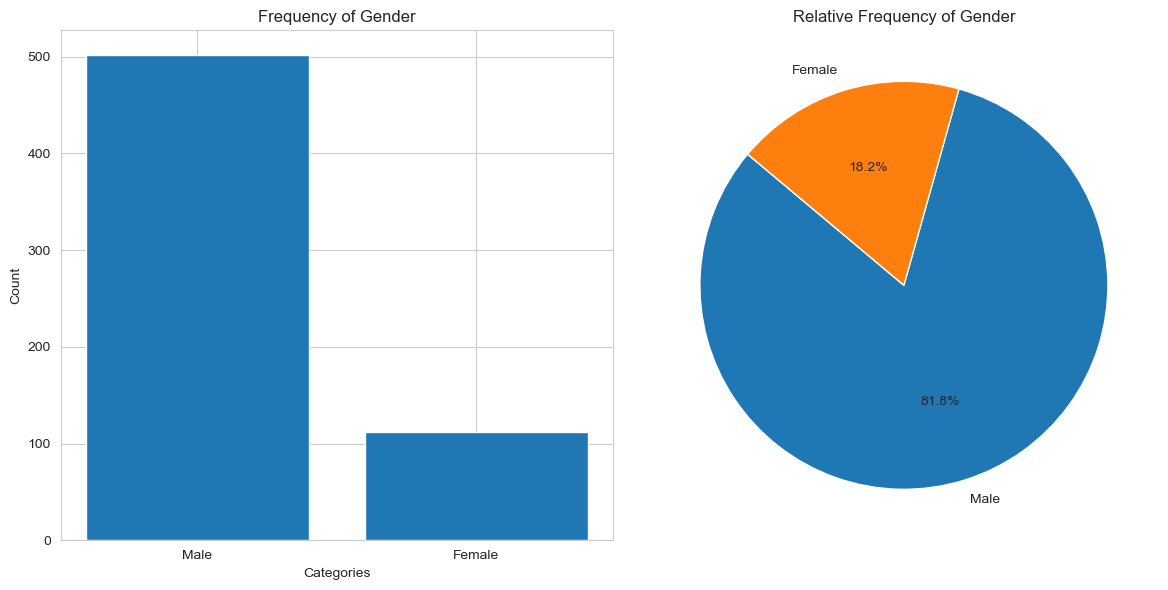

Married frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  Yes  |    401    |
| 1 |  No   |    213    |
+---+-------+-----------+
Married Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  Yes  |    401    |        65.31         |
| 1 |  No   |    213    |        34.69         |
+---+-------+-----------+----------------------+


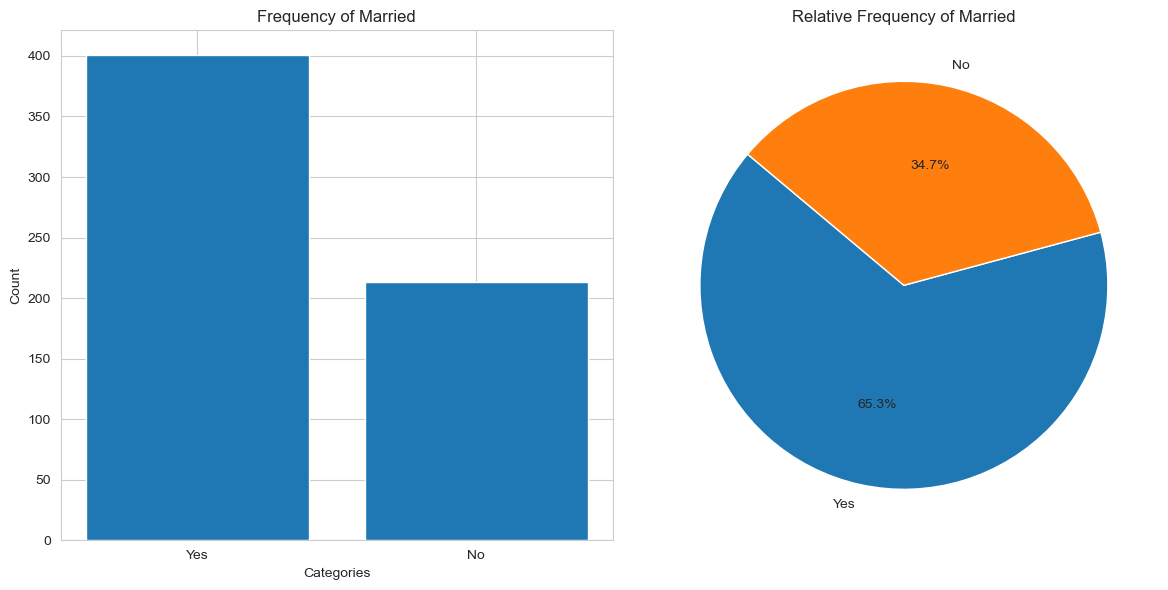

Dependents frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   0   |    360    |
| 1 |   1   |    102    |
| 2 |   2   |    101    |
| 3 |   4   |    51     |
+---+-------+-----------+
Dependents Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   0   |    360    |        58.63         |
| 1 |   1   |    102    |        16.61         |
| 2 |   2   |    101    |        16.45         |
| 3 |   4   |    51     |         8.31         |
+---+-------+-----------+----------------------+


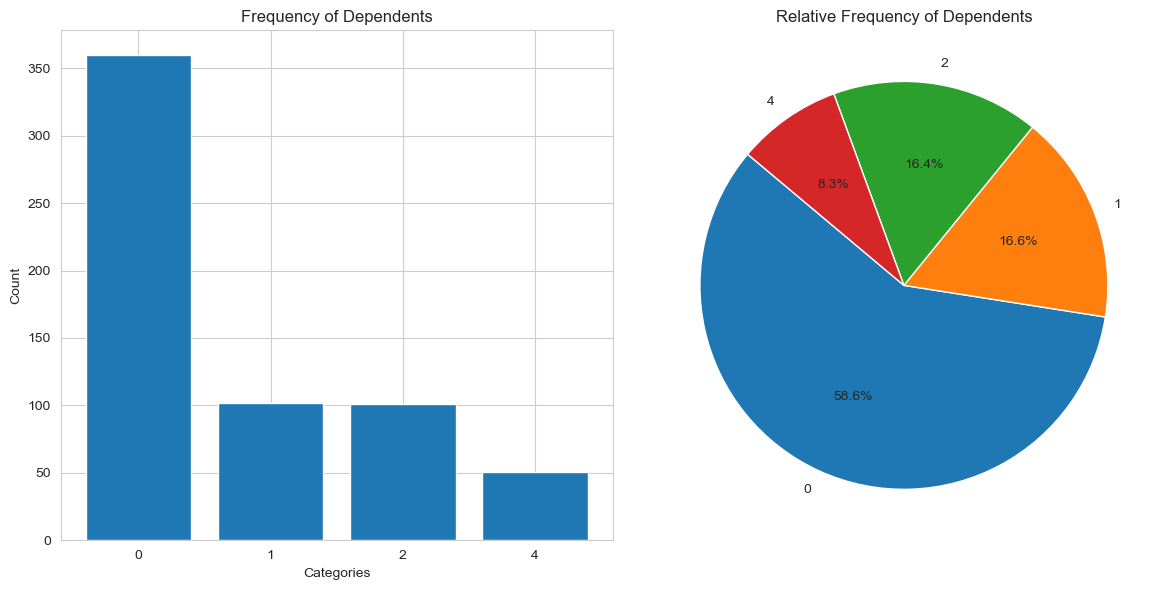

Education frequency table
+---+--------------+-----------+
|   |    Class     | Frequency |
+---+--------------+-----------+
| 0 |   Graduate   |    480    |
| 1 | Not Graduate |    134    |
+---+--------------+-----------+
Education Relative frequency table
+---+--------------+-----------+----------------------+
|   |    Class     | Frequency | Relative Frequency % |
+---+--------------+-----------+----------------------+
| 0 |   Graduate   |    480    |        78.18         |
| 1 | Not Graduate |    134    |        21.82         |
+---+--------------+-----------+----------------------+


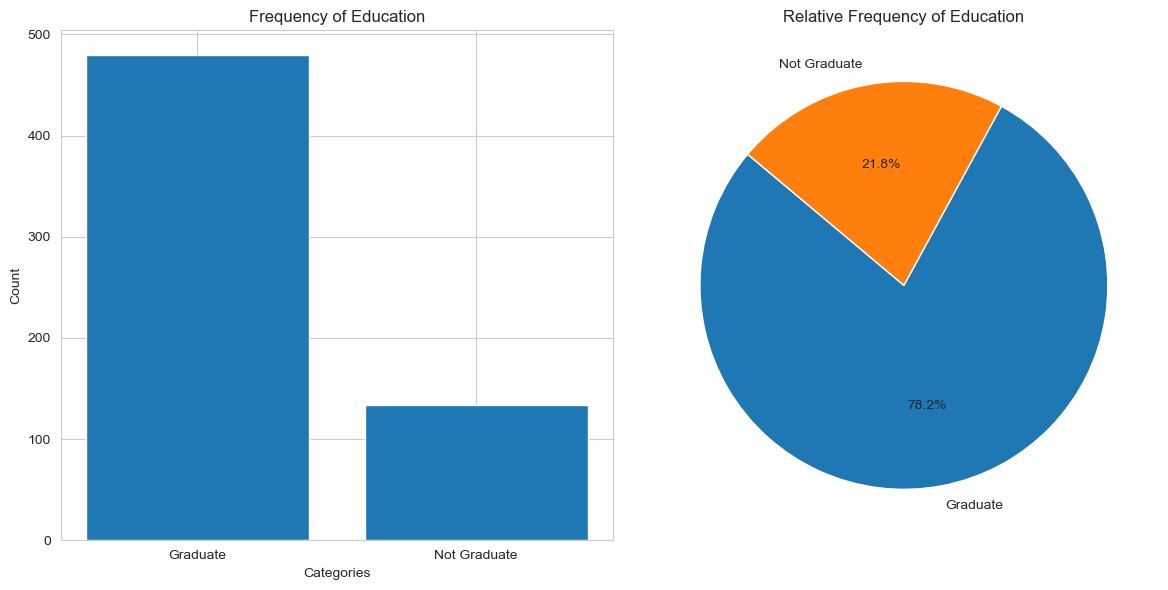

Self_Employed frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |    532    |
| 1 |  Yes  |    82     |
+---+-------+-----------+
Self_Employed Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |    532    |        86.64         |
| 1 |  Yes  |    82     |        13.36         |
+---+-------+-----------+----------------------+


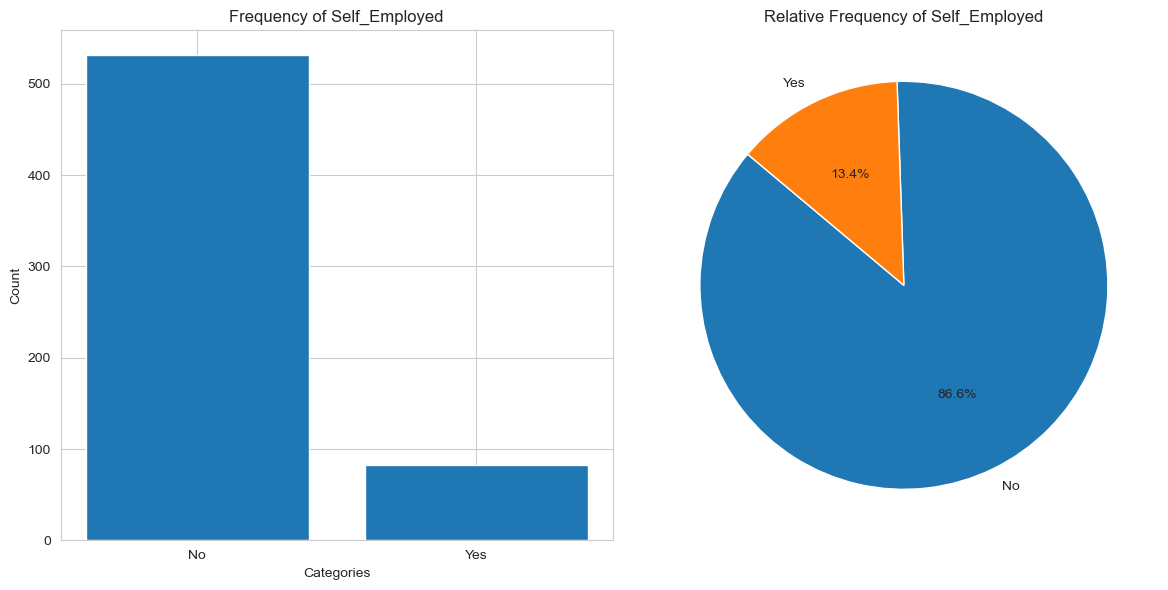

Credit_History frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   Y   |    525    |
| 1 |   N   |    89     |
+---+-------+-----------+
Credit_History Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   Y   |    525    |         85.5         |
| 1 |   N   |    89     |         14.5         |
+---+-------+-----------+----------------------+


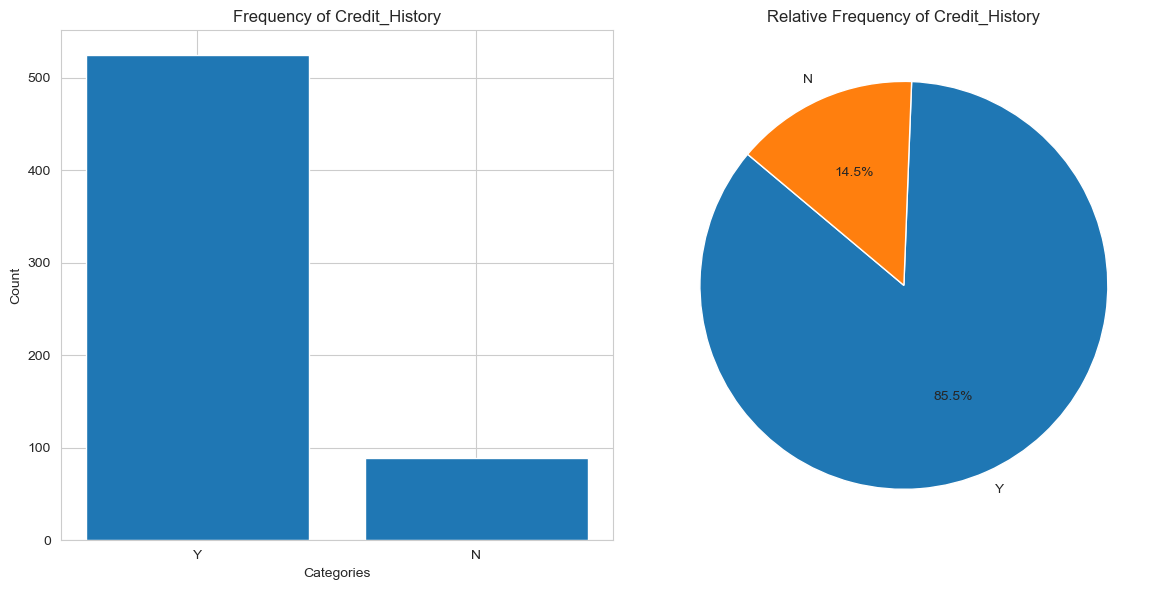

Property_Area frequency table
+---+-----------+-----------+
|   |   Class   | Frequency |
+---+-----------+-----------+
| 0 | Semiurban |    233    |
| 1 |   Urban   |    202    |
| 2 |   Rural   |    179    |
+---+-----------+-----------+
Property_Area Relative frequency table
+---+-----------+-----------+----------------------+
|   |   Class   | Frequency | Relative Frequency % |
+---+-----------+-----------+----------------------+
| 0 | Semiurban |    233    |        37.95         |
| 1 |   Urban   |    202    |         32.9         |
| 2 |   Rural   |    179    |        29.15         |
+---+-----------+-----------+----------------------+


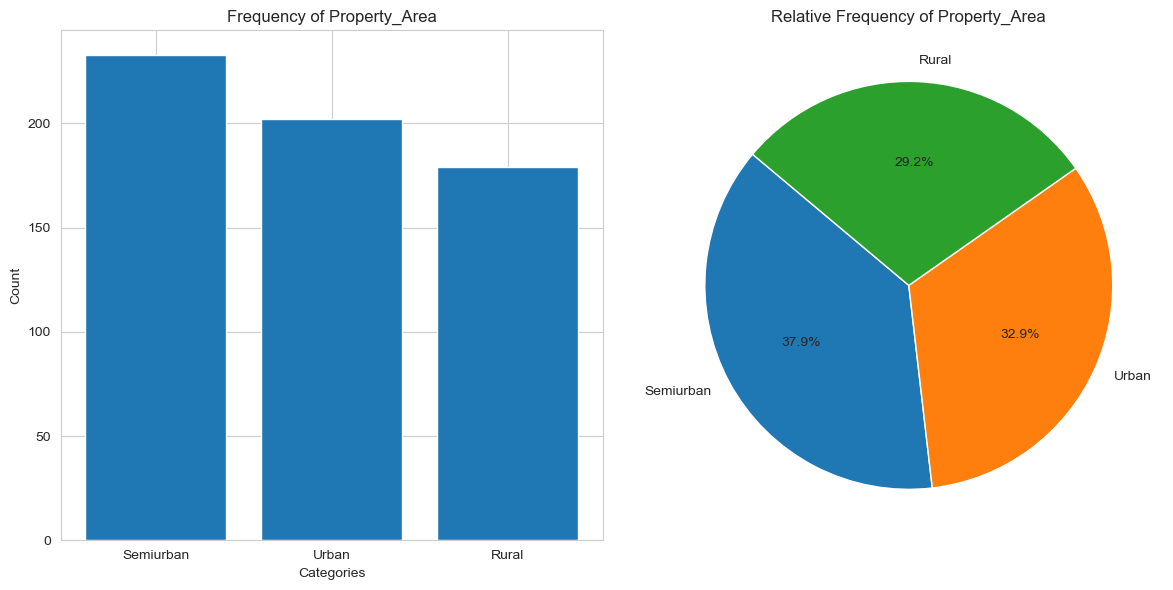

Loan_Status frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |   Y   |    422    |
| 1 |   N   |    192    |
+---+-------+-----------+
Loan_Status Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |   Y   |    422    |        68.73         |
| 1 |   N   |    192    |        31.27         |
+---+-------+-----------+----------------------+


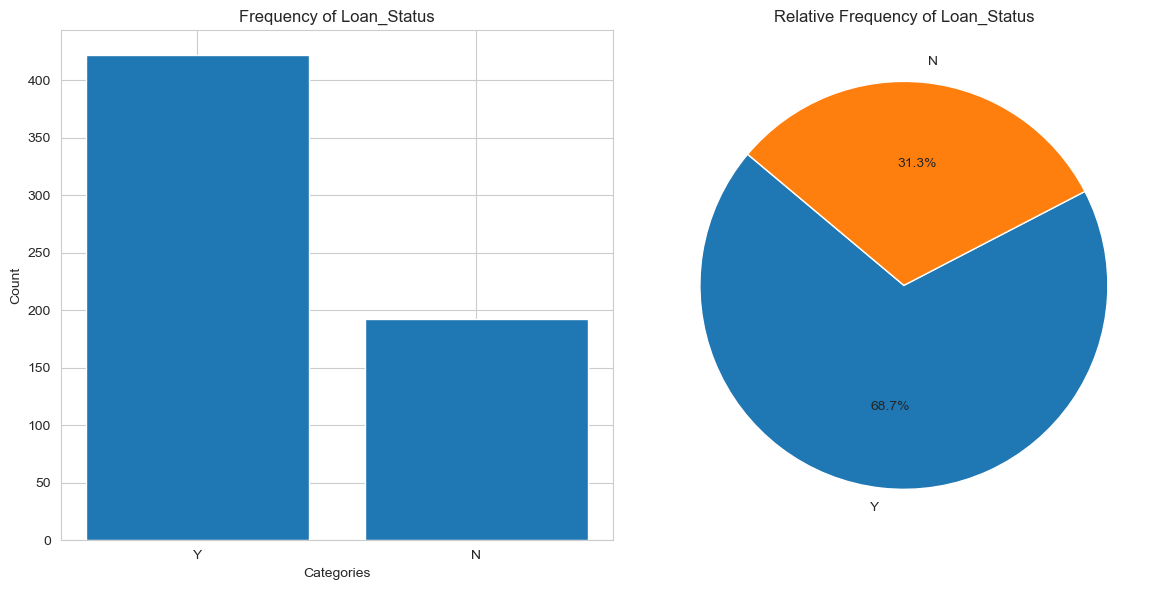

In [79]:
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(loan_df)

# 6. Handling Missing Values in Numerical Columns

In [80]:
loan_df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [81]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [82]:
global_loan_amount_term_mode = loan_df['Loan_Amount_Term'].mode()[0]
loan_df['Loan_Amount_Term'].fillna(global_loan_amount_term_mode,inplace=True)

In [83]:
global_loan_amount_mean = 0
for var in ["LoanAmount"]:
    mean = loan_df[var].mean()
    global_loan_amount_mean = mean
    #print(median)

    # fill the missing value with mode
    loan_df[var].fillna(global_loan_amount_mean,inplace=True)
    
# check for missing values - for confirmation
loan_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# 7. Numerical - UniVariable - Analysis - Using -Pipeline

In [84]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # getting num cols
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
           
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var],  color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()       
        

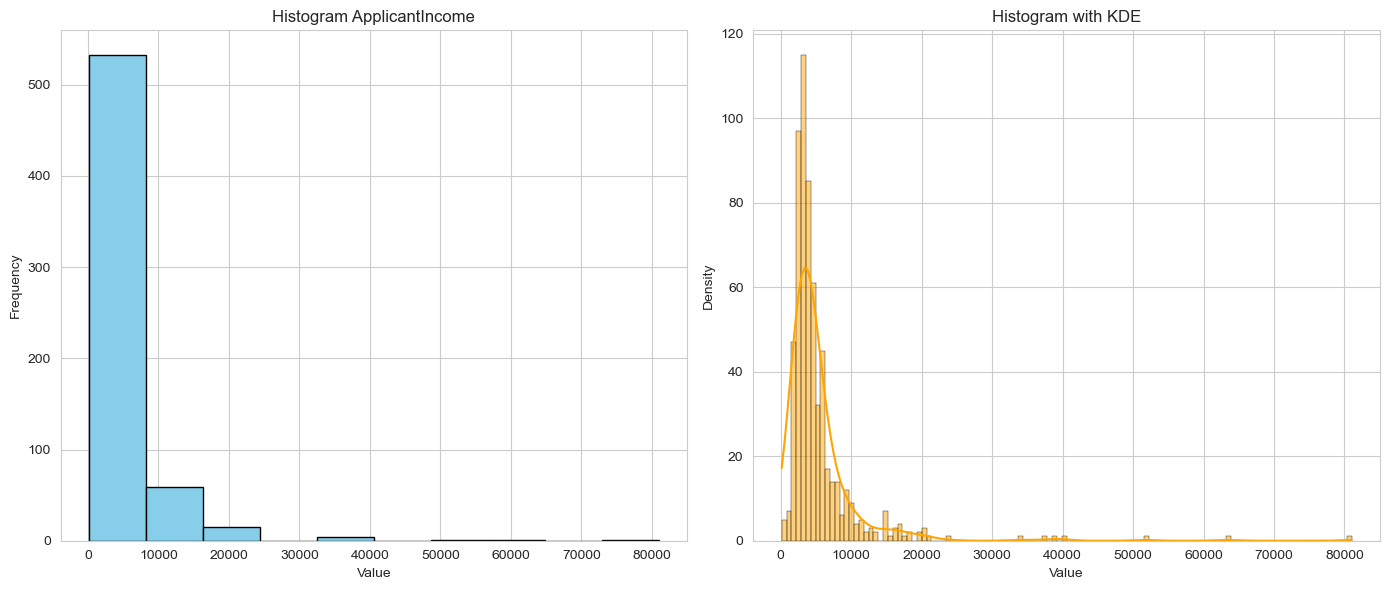

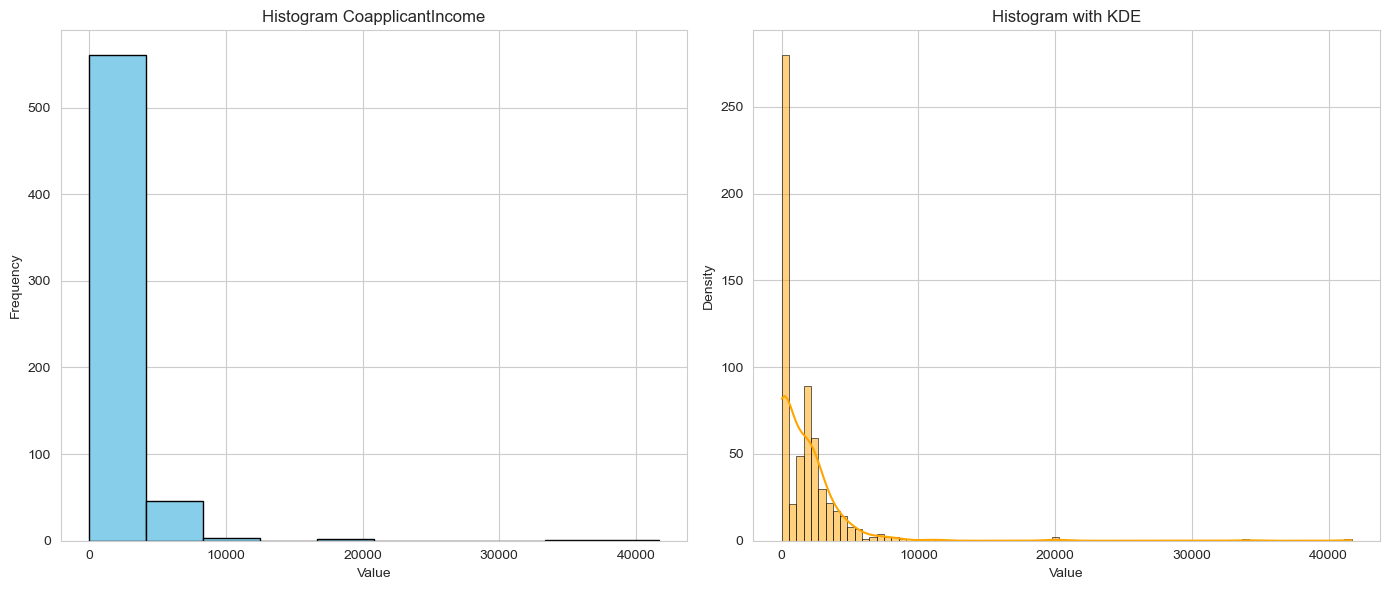

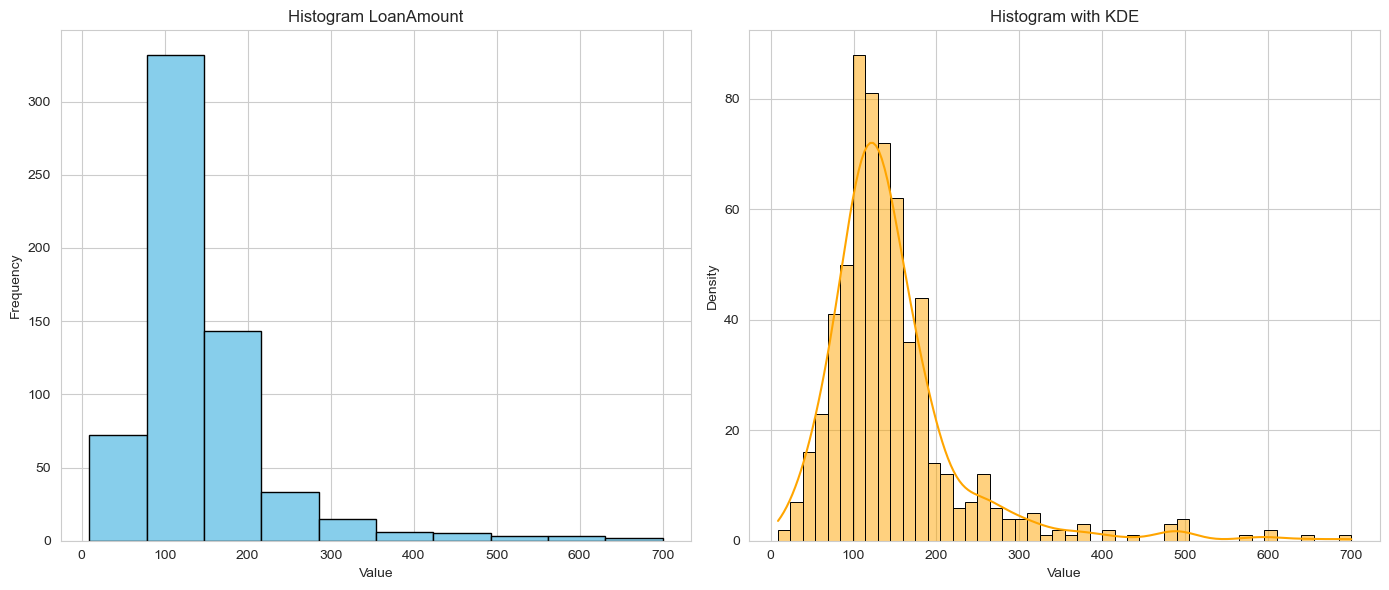

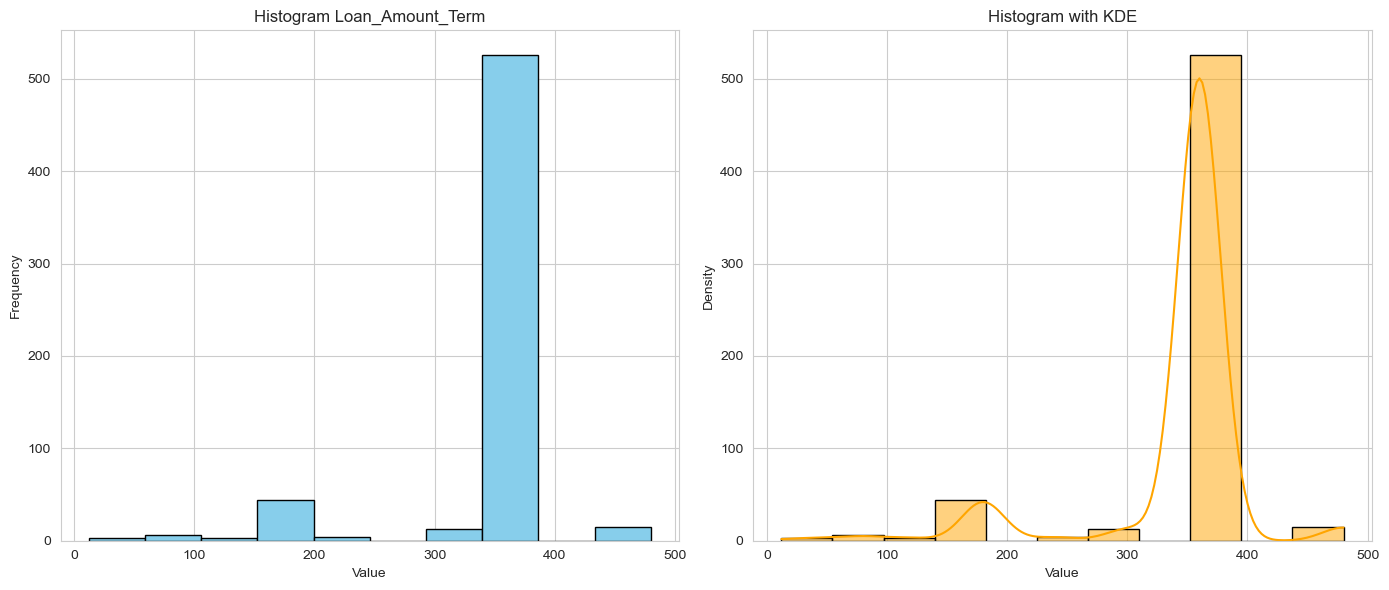

In [85]:

pipeline_num_var = Pipeline([
    ('num_uni_variate_analysis', HistBoxChartTransformer())
])

loan_num_df = loan_df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(loan_num_df)

# 8. Numerical - Variables -Outliers Analysis

In [86]:
def find_outliers_fill_with_median(con_var):
    """find outliers and remove the outliers from the dataset for given var - feature"""
    print(f"outliers filling for {con_var}")
    q1 = loan_df[con_var].quantile(0.25)
    q3 = loan_df[con_var].quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5*iqr)
    higher_fence = q3 + (1.5*iqr)

    cond1 = loan_df[con_var] < lower_fence
    cond2 = loan_df[con_var] > higher_fence

    
    con = cond1 |  cond2
    val = loan_df[con_var].median()
    loan_df[con_var]=np.where(con, val,loan_df[con_var])
    plt.boxplot(loan_df[con_var])
    plt.show()

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')
outliers filling for ApplicantIncome


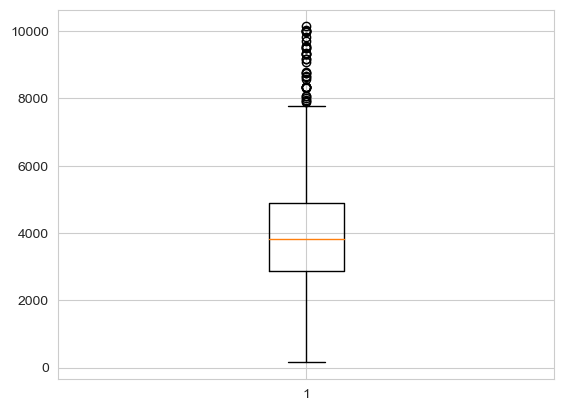

outliers filling for CoapplicantIncome


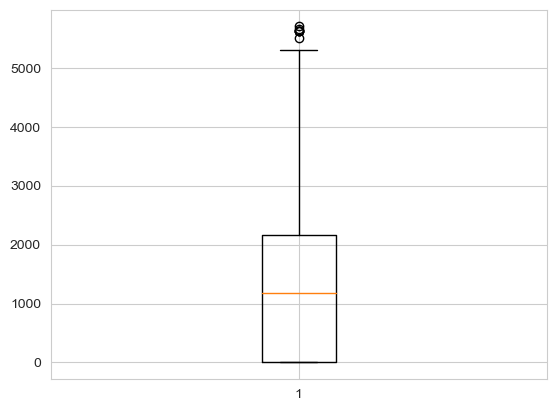

outliers filling for LoanAmount


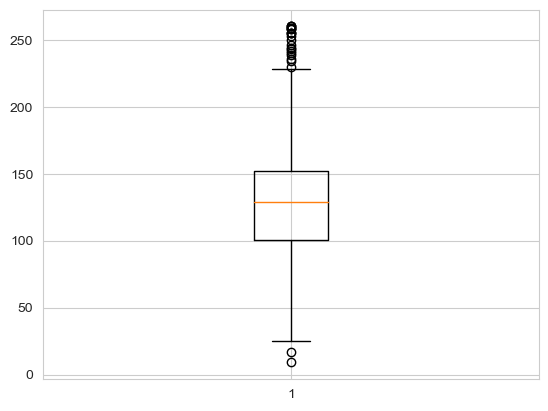

In [87]:
loan_num_df = loan_df[["ApplicantIncome","CoapplicantIncome","LoanAmount"]].copy()
con_vars = loan_num_df.select_dtypes(exclude="object").columns
print(con_vars)
for var in con_vars:
    find_outliers_fill_with_median(var)
    print("========================================================")

# 9. Bi Variate Analysis

###  9.1 Cat Vs Cat

In [88]:
cat_vars = loan_df.select_dtypes(include="object").columns
print(cat_vars)
cat_vars = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History']

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


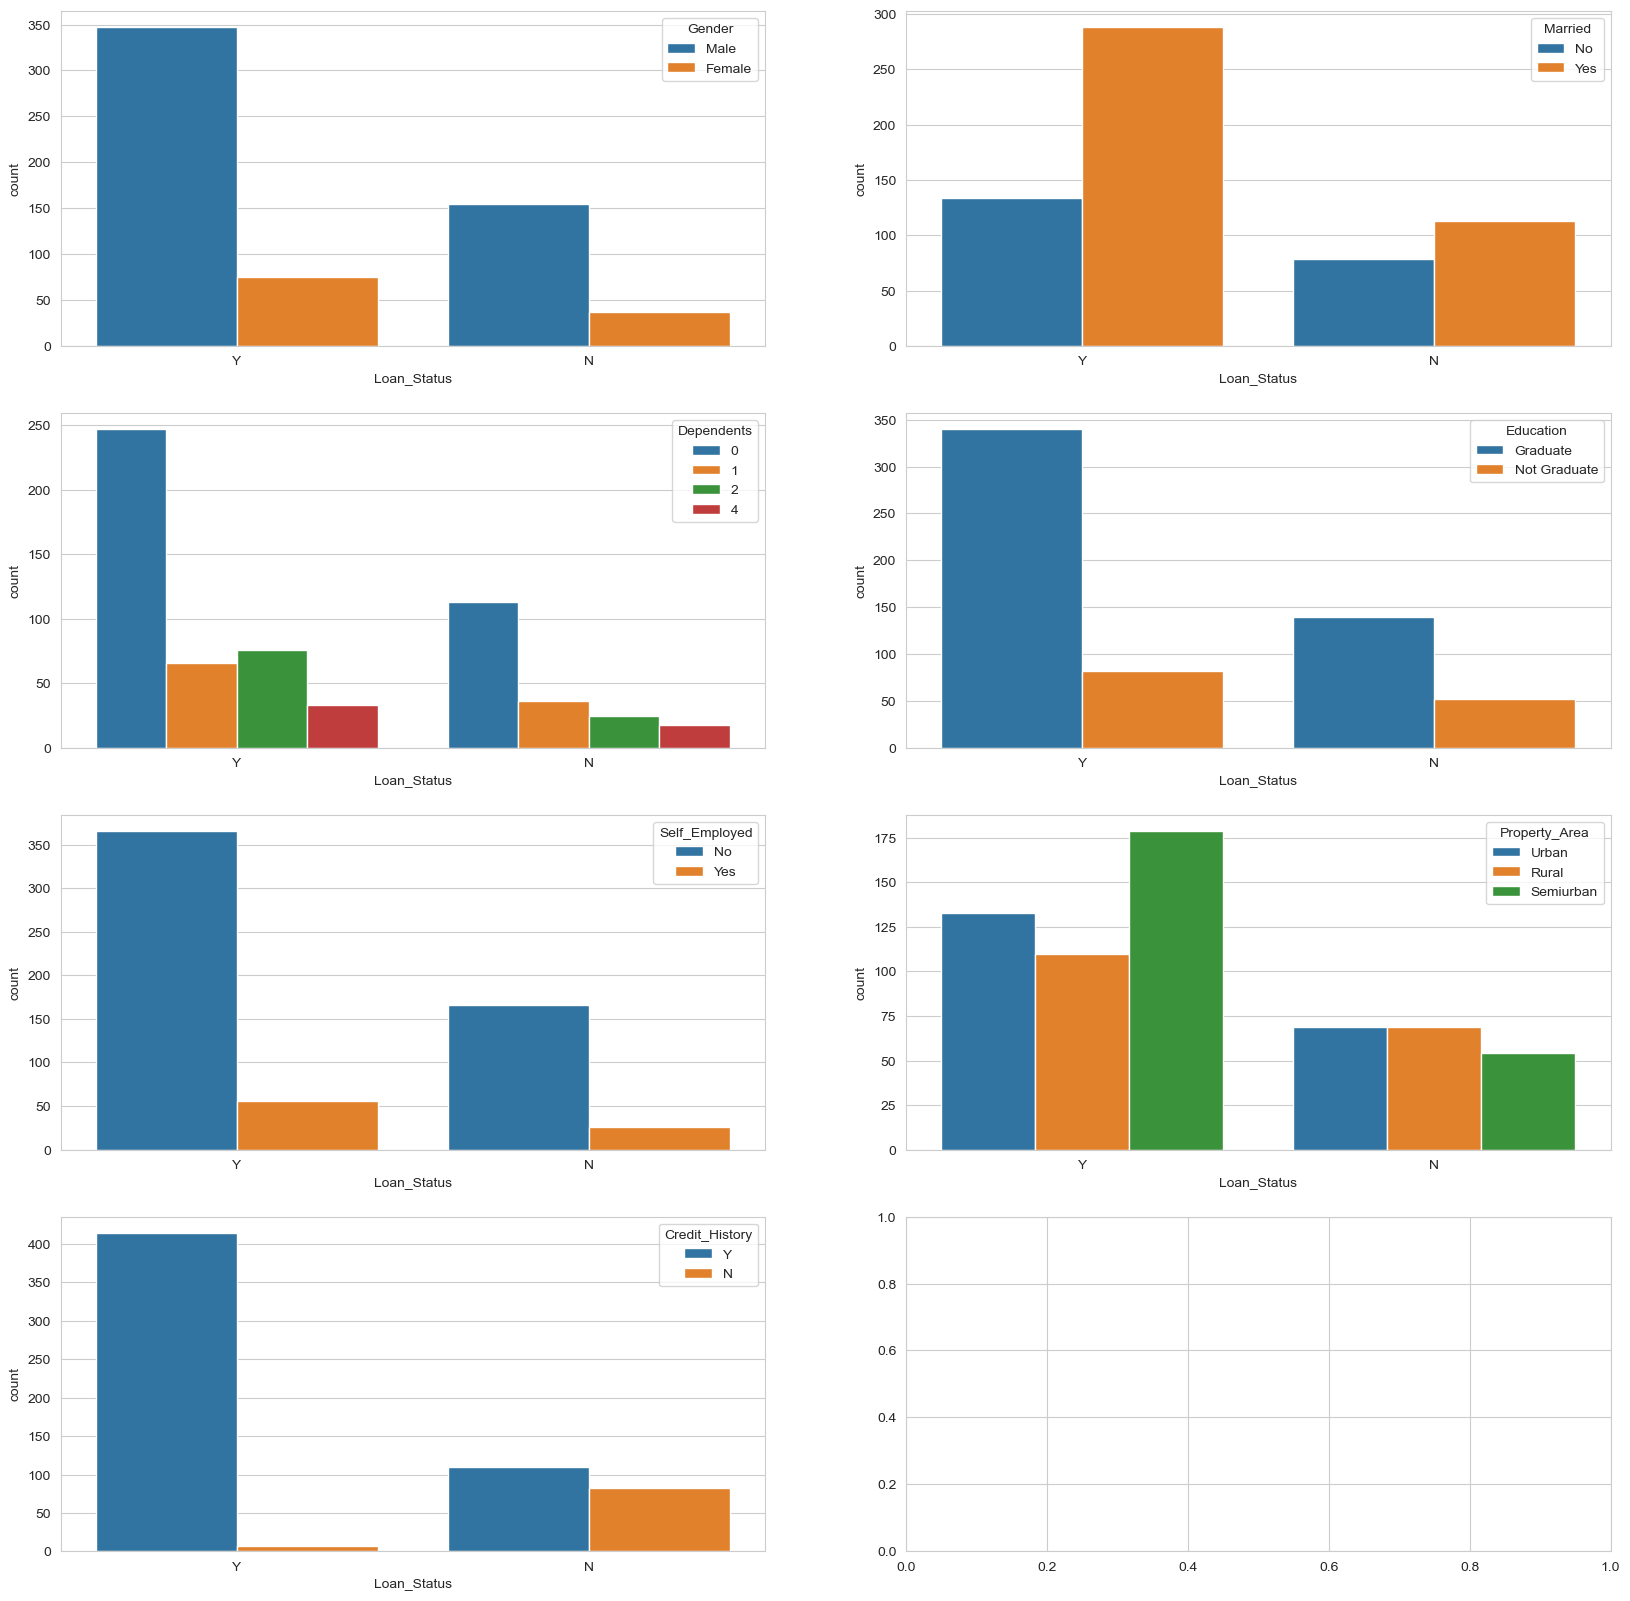

In [89]:
## Cat Vs Cat
fig,ax = plt.subplots(4,2,figsize=(20,20))
for axi,x in zip(ax.flat,cat_vars):
    sns.countplot(x=loan_df.Loan_Status,hue=loan_df[x],ax=axi)

### 9.2 Cat Vs Num

In [90]:
## Cat Vs Num
loan_df.select_dtypes(exclude="object").columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [91]:
output_var='Loan_Status'

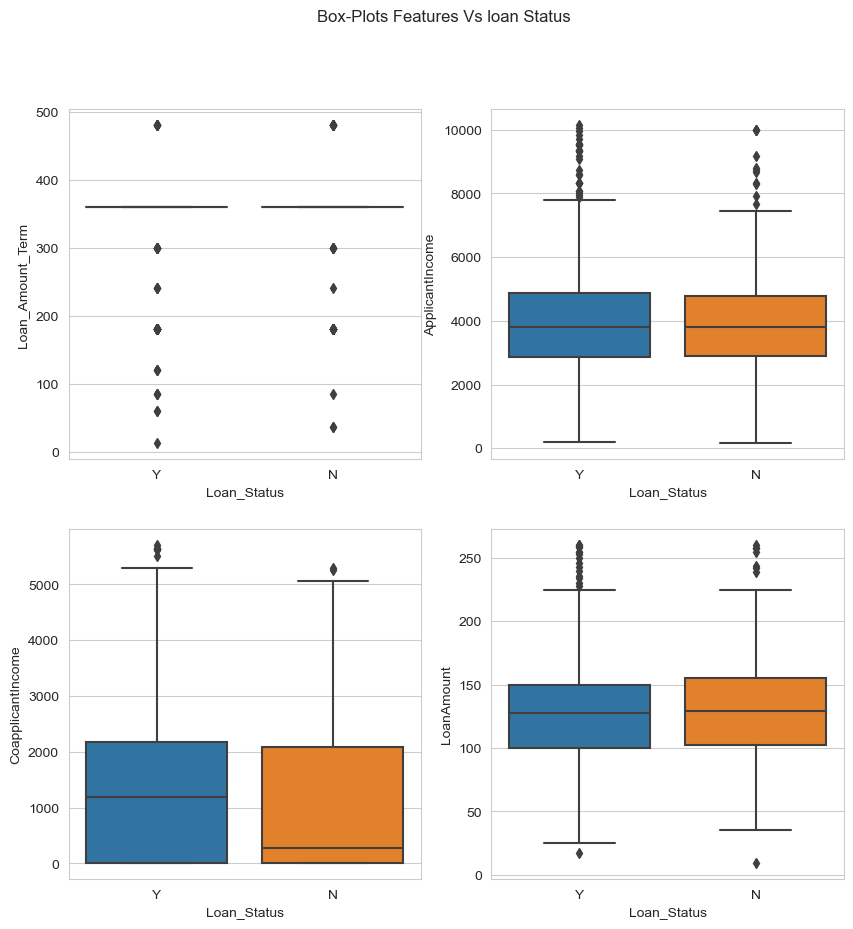

In [92]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Box-Plots Features Vs loan Status')
sns.boxplot(ax=axes[0, 0], x=output_var, y='Loan_Amount_Term', data=loan_df)
sns.boxplot(ax=axes[0, 1], x=output_var, y='ApplicantIncome', data=loan_df)
sns.boxplot(ax=axes[1, 0], x=output_var, y='CoapplicantIncome', data=loan_df)
sns.boxplot(ax=axes[1, 1], x=output_var, y='LoanAmount', data=loan_df)
plt.show()

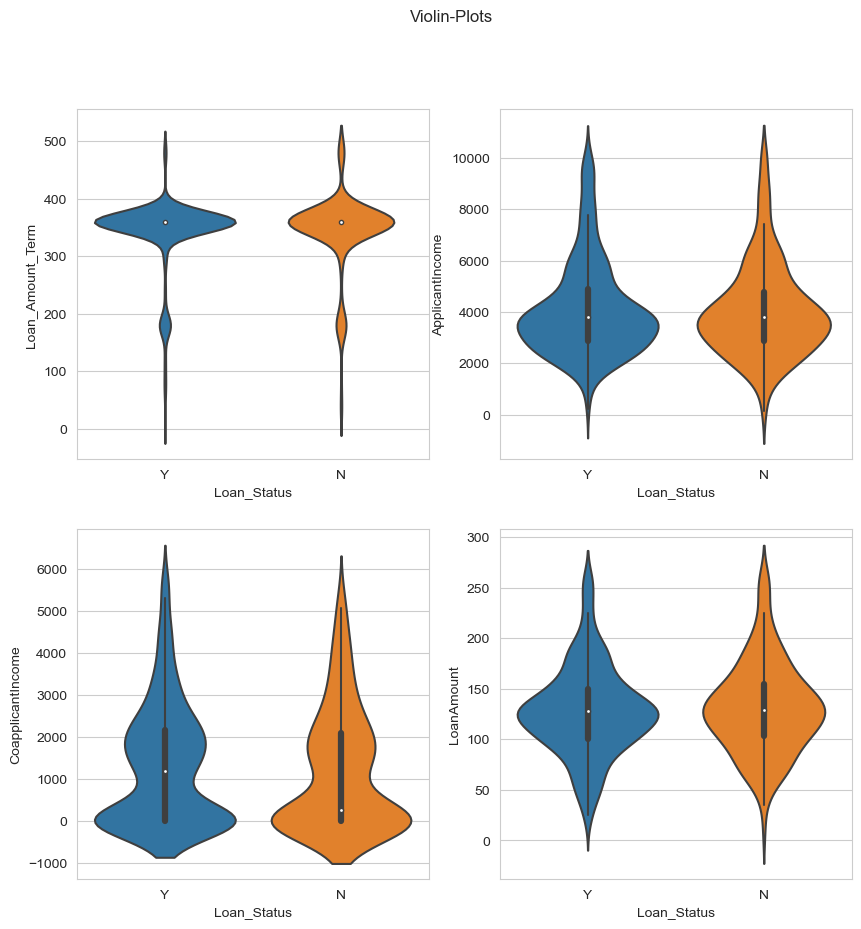

In [93]:

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Violin-Plots')
sns.violinplot(ax=axes[0, 0], x=output_var, y='Loan_Amount_Term', data=loan_df)
sns.violinplot(ax=axes[0, 1], x=output_var, y='ApplicantIncome', data=loan_df)
sns.violinplot(ax=axes[1, 0], x=output_var, y='CoapplicantIncome', data=loan_df)
sns.violinplot(ax=axes[1, 1], x=output_var, y='LoanAmount', data=loan_df)
plt.show()

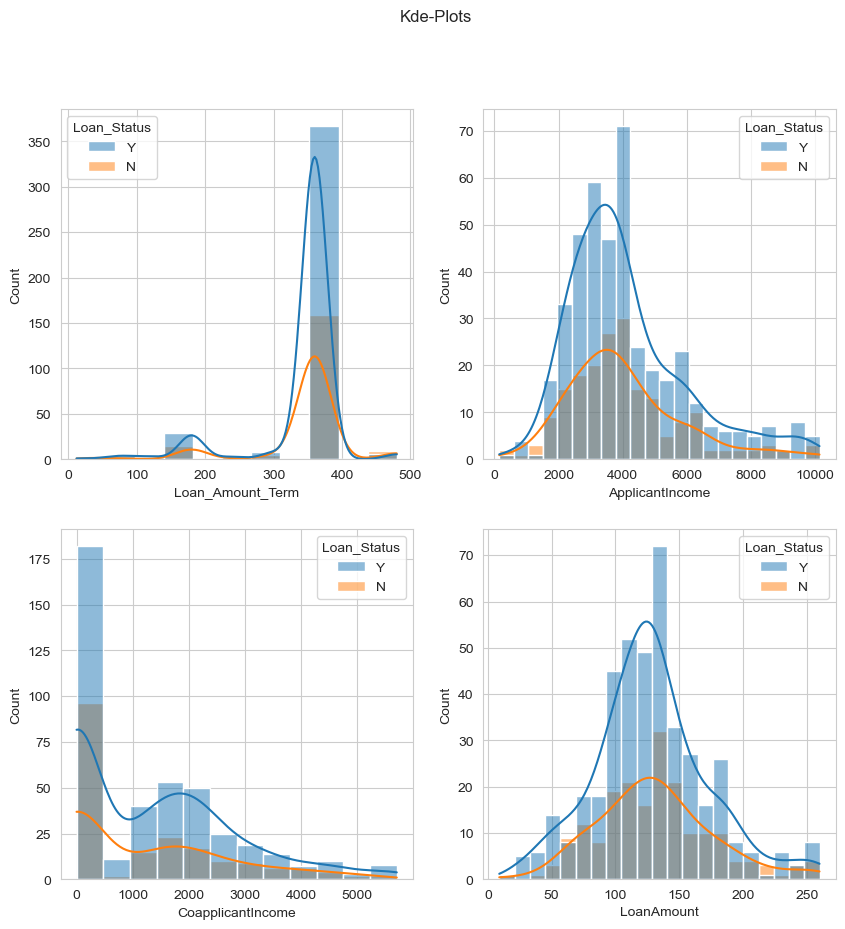

In [94]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Kde-Plots')
sns.histplot(ax=axes[0, 0], hue=output_var, x='Loan_Amount_Term', data=loan_df,kde=True)
sns.histplot(ax=axes[0, 1], hue=output_var, x='ApplicantIncome', data=loan_df,kde=True)
sns.histplot(ax=axes[1, 0], hue=output_var, x='CoapplicantIncome', data=loan_df,kde=True)
sns.histplot(ax=axes[1, 1], hue=output_var, x='LoanAmount', data=loan_df,kde=True)
plt.show()

## 9.3 Num Vs Num

In [95]:
loan_df.select_dtypes(exclude="object").columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

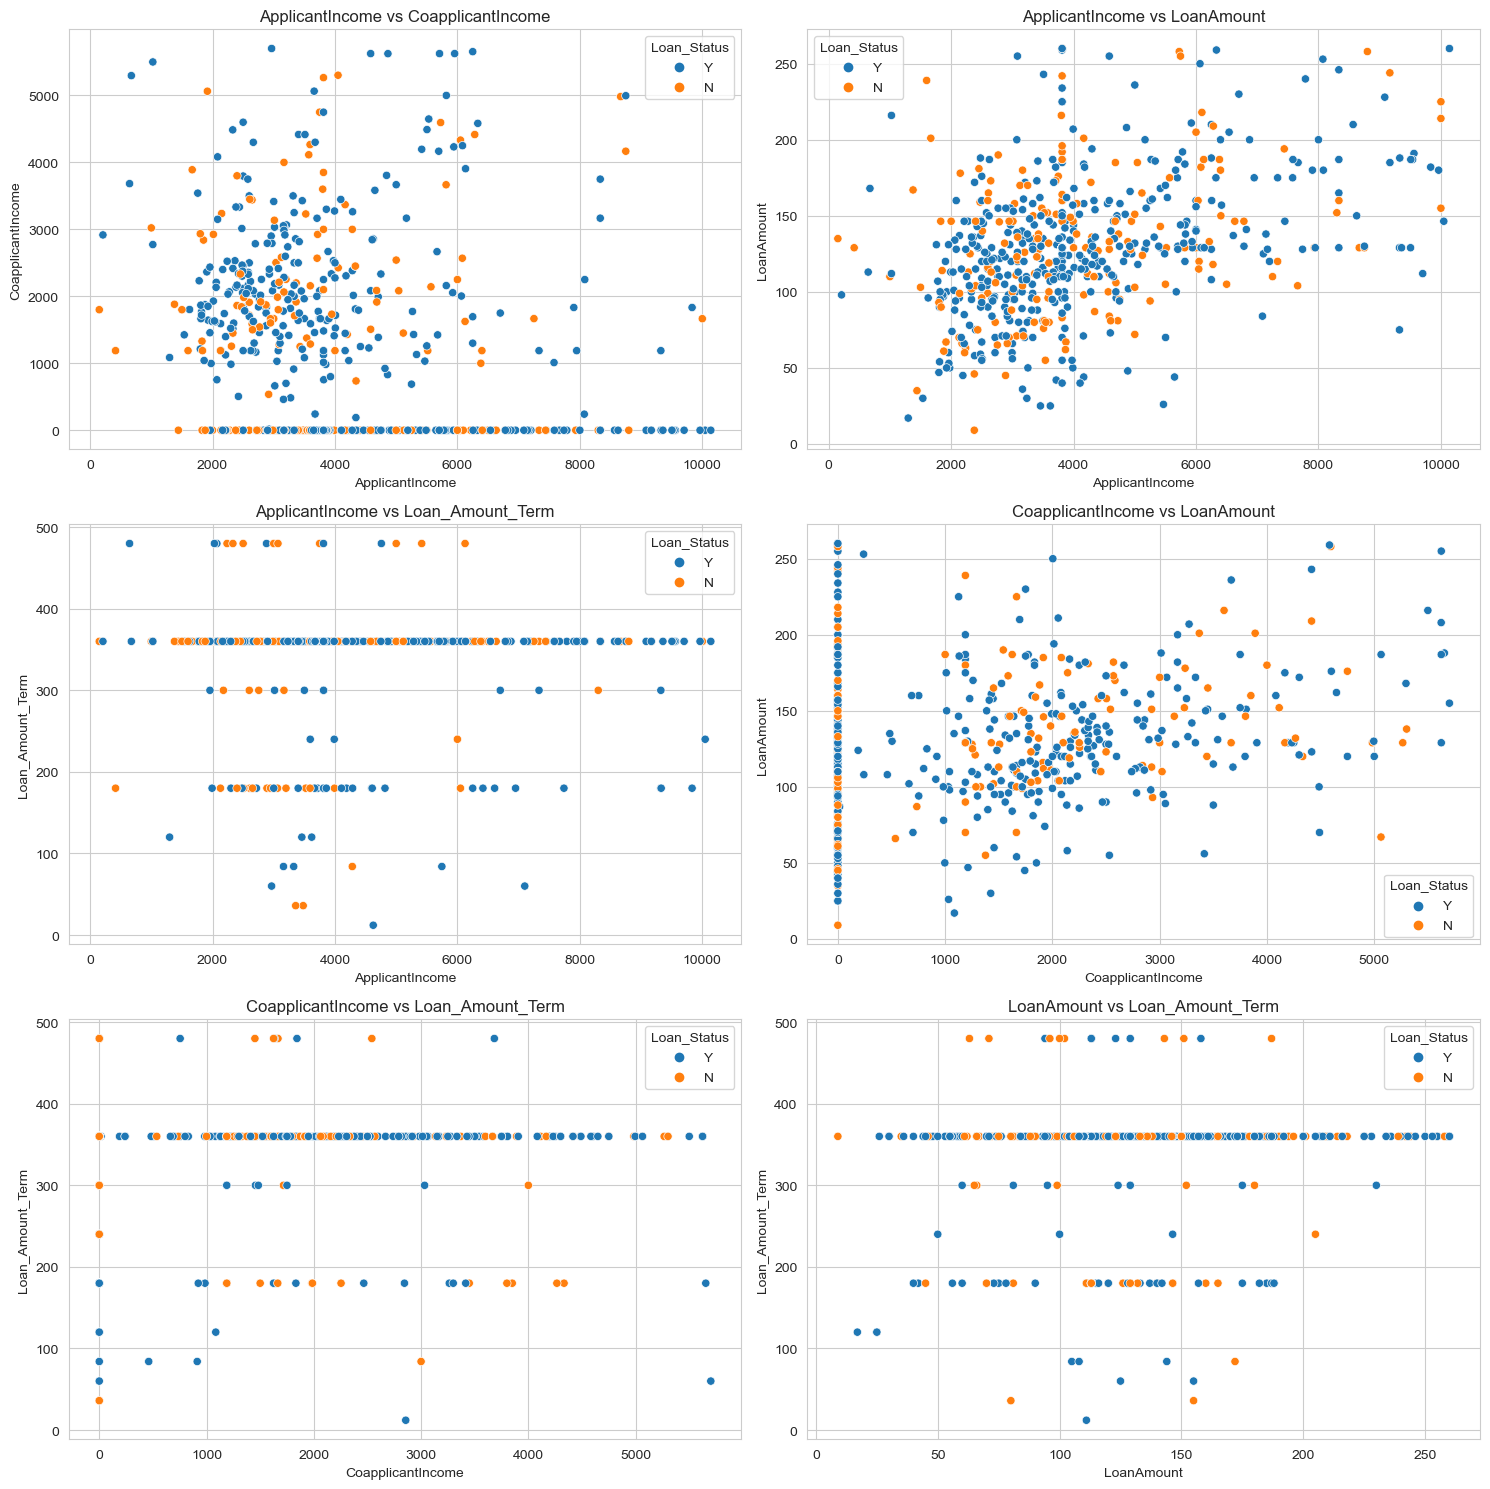

In [96]:

# Selecting only numerical columns
numerical_columns = loan_df.select_dtypes(exclude="object").columns

# Creating unique scatter plots
num_cols_count = len(numerical_columns)
num_plots = num_cols_count * (num_cols_count - 1) // 2

# Setting up subplots
fig, axes = plt.subplots(num_plots // 2, 2, figsize=(15, 15))

plot_index = 0
for i in range(num_cols_count):
    for j in range(i+1, num_cols_count):
        row = plot_index // 2
        col = plot_index % 2

        # Scatter plot
        sns.scatterplot(x=numerical_columns[i], y=numerical_columns[j], hue=output_var,data=loan_df, ax=axes[row, col])
        axes[row, col].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')

        plot_index += 1

plt.tight_layout()
plt.show()

### 9.4 Correaltion Numerical Columns

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.198660    0.409769   
CoapplicantIncome        -0.198660           1.000000    0.217976   
LoanAmount                0.409769           0.217976    1.000000   
Loan_Amount_Term         -0.035532          -0.005549    0.077932   

                   Loan_Amount_Term  
ApplicantIncome           -0.035532  
CoapplicantIncome         -0.005549  
LoanAmount                 0.077932  
Loan_Amount_Term           1.000000  


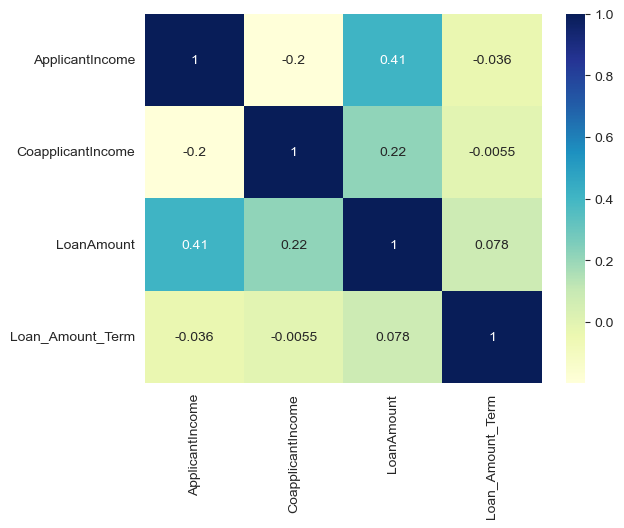

In [97]:
print(loan_df.corr(numeric_only=True))
sns.heatmap(loan_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

# 10. Data Transformation

In [98]:
 num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

C:\Users\91956\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


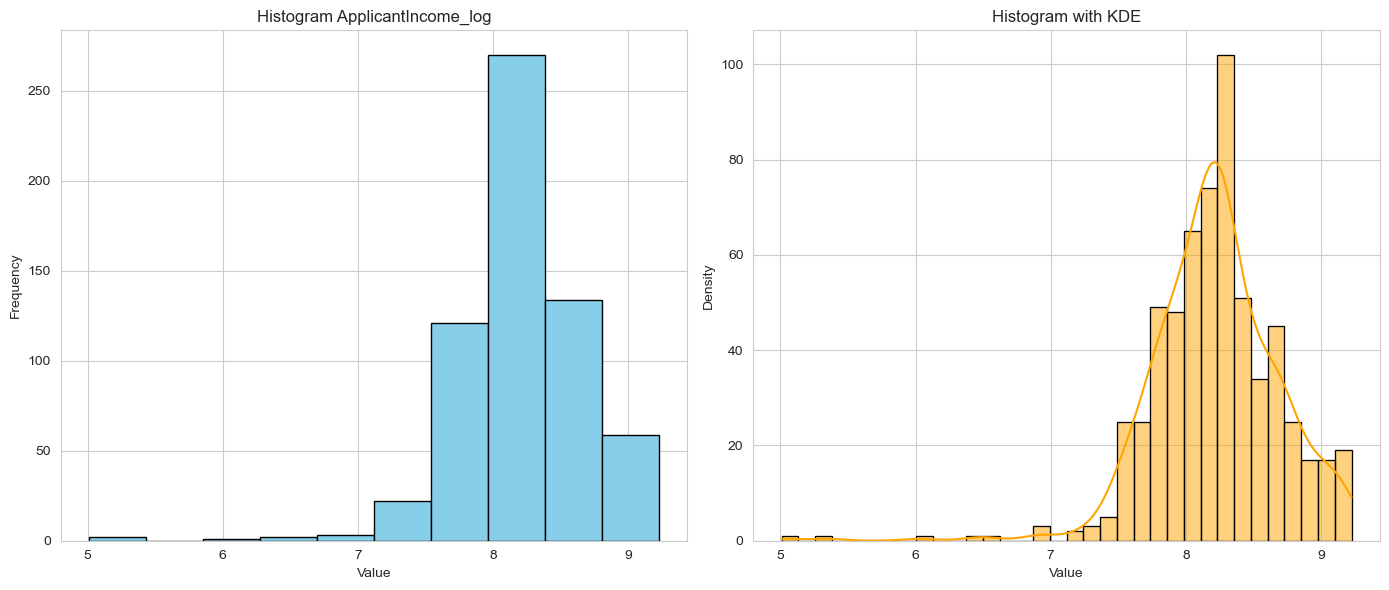

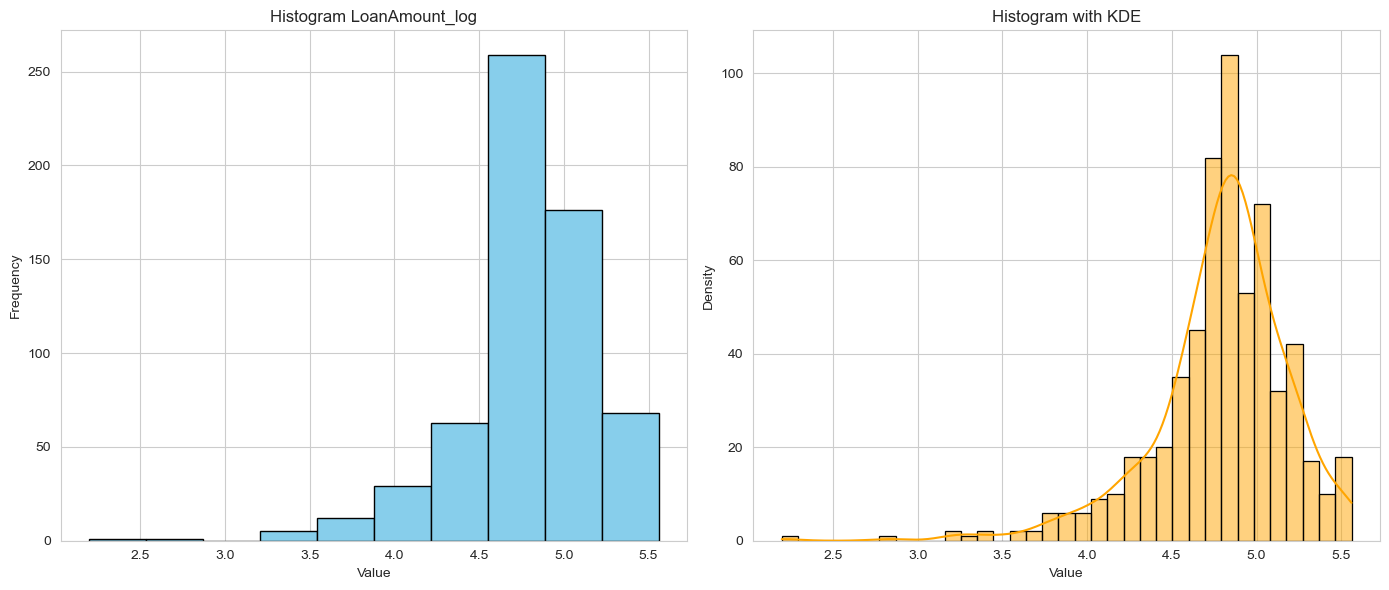

In [99]:
loan_df["ApplicantIncome_log"]=np.log(loan_df["ApplicantIncome"])
loan_df["CoapplicantIncome_log"]=np.log(loan_df["CoapplicantIncome"])
loan_df["LoanAmount_log"]=np.log(loan_df["LoanAmount"])

loan_num_df = loan_df[['ApplicantIncome_log',  'LoanAmount_log']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(loan_num_df)

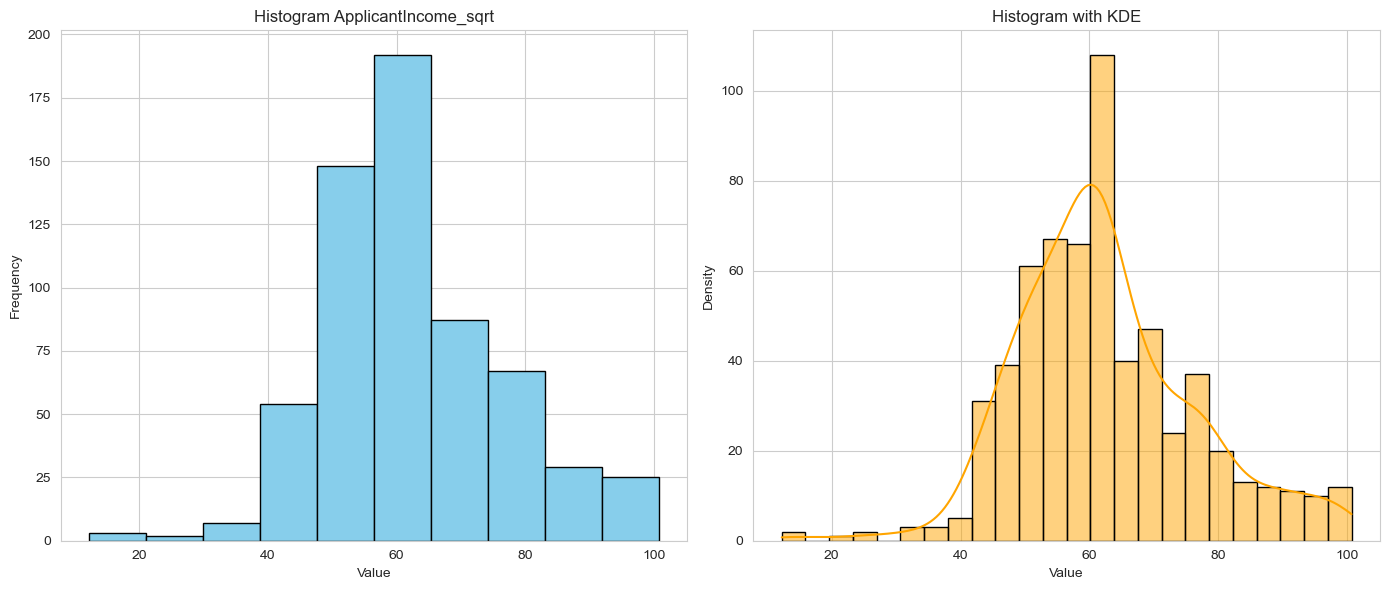

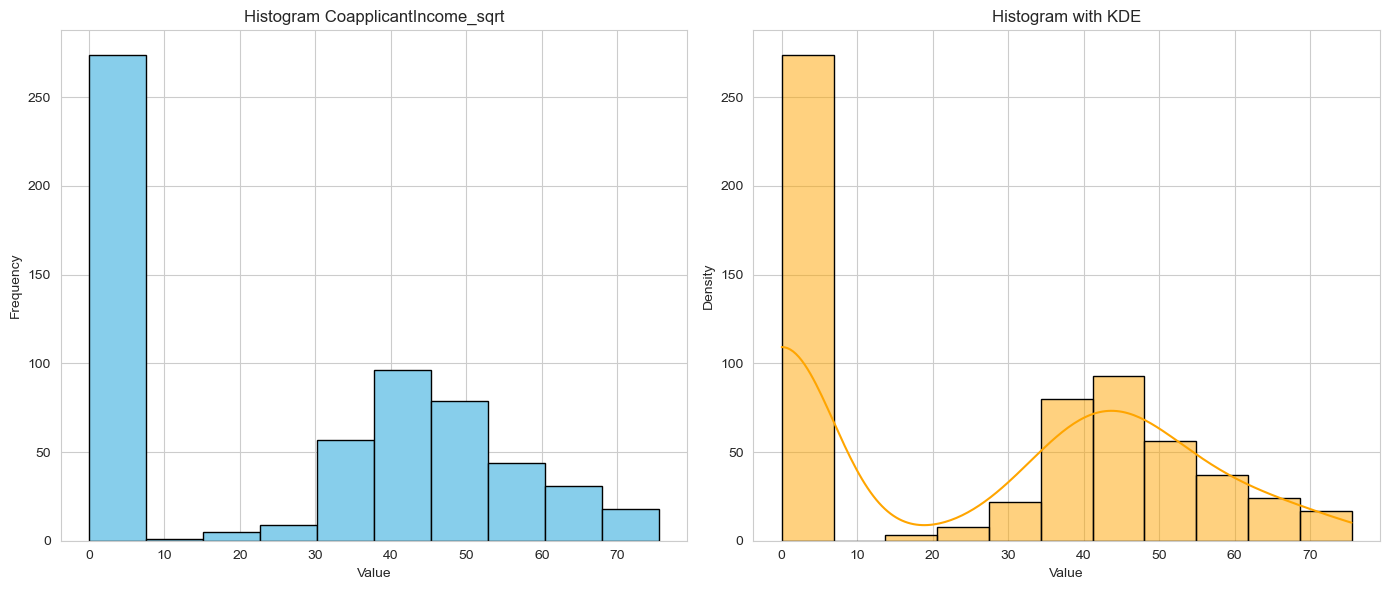

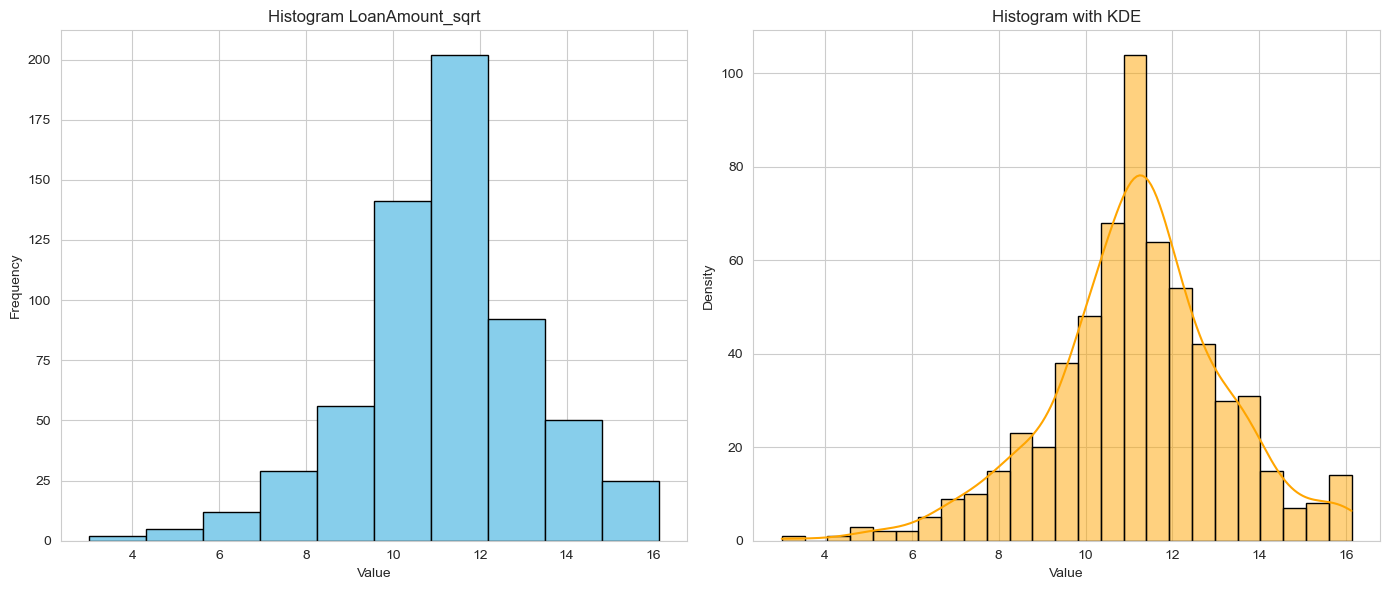

In [100]:
loan_df["ApplicantIncome_sqrt"]=np.sqrt(loan_df["ApplicantIncome"])
loan_df["CoapplicantIncome_sqrt"]=np.sqrt(loan_df["CoapplicantIncome"])
loan_df["LoanAmount_sqrt"]=np.sqrt(loan_df["LoanAmount"])

loan_num_df = loan_df[['ApplicantIncome_sqrt', 'CoapplicantIncome_sqrt', 'LoanAmount_sqrt']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(loan_num_df)

# 11. Standization - Normalization

In [101]:
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns
scaled_columns = scaler.fit_transform(loan_df[['ApplicantIncome_sqrt', 'CoapplicantIncome_sqrt', 'LoanAmount_sqrt']])

# Replace the original columns with the scaled columns
loan_df[['ApplicantIncome_sqrt_stand', 'CoapplicantIncome_sqrt_stand','LoanAmount_sqrt_stand']] = scaled_columns

print(loan_df)

     Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0      Male      No          0      Graduate            No           5849.0   
1      Male     Yes          1      Graduate            No           4583.0   
2      Male     Yes          0      Graduate           Yes           3000.0   
3      Male     Yes          0  Not Graduate            No           2583.0   
4      Male      No          0      Graduate            No           6000.0   
..      ...     ...        ...           ...           ...              ...   
609  Female      No          0      Graduate            No           2900.0   
610    Male     Yes          4      Graduate            No           4106.0   
611    Male     Yes          1      Graduate            No           8072.0   
612    Male     Yes          2      Graduate            No           7583.0   
613  Female      No          0      Graduate           Yes           4583.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

# 12. Convert Cat - to - Numerical Columns

In [102]:
le = LabelEncoder()
loan_df["Loan_Status"]=le.fit_transform(loan_df["Loan_Status"])

# 13. SMOTE for Balancing Data

In [103]:
Y=loan_df["Loan_Status"]
X=loan_df[[ 'Married',  'Education','Property_Area','Credit_History','ApplicantIncome_sqrt_stand', 'CoapplicantIncome_sqrt_stand','LoanAmount_sqrt_stand']]
print(len(Y),len(X))
X=pd.get_dummies(X,dtype='int',drop_first=False)

614 614


In [104]:
X, Y = SMOTE().fit_resample(X, Y)

In [119]:
print(X.columns)
print(len(Y),len(X))

Index(['ApplicantIncome_sqrt_stand', 'CoapplicantIncome_sqrt_stand',
       'LoanAmount_sqrt_stand', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_N',
       'Credit_History_Y'],
      dtype='object')
844 844


In [106]:
Y.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

# ML Models

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)

In [108]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

## Logistic Regression 

Model - Logistic Regression
accuracy train score overall : 0.7540740740740741
accuracy test score overall : 0.7159763313609467
              precision    recall  f1-score   support

           0       0.88      0.56      0.69        94
           1       0.62      0.91      0.74        75

    accuracy                           0.72       169
   macro avg       0.75      0.74      0.71       169
weighted avg       0.77      0.72      0.71       169

[[53 41]
 [ 7 68]]


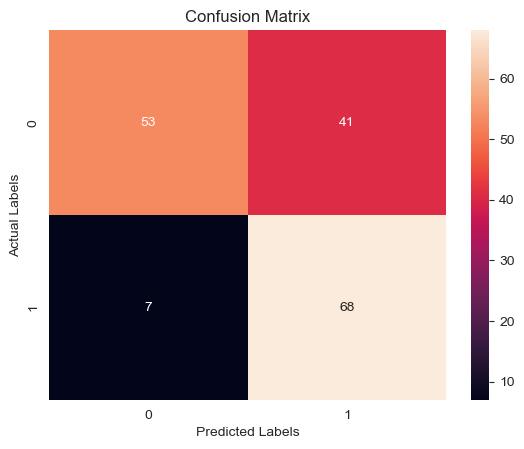

In [109]:
lg_model = LogisticRegression(solver='saga', max_iter=500, random_state=42)
lg_model.fit(X_train, Y_train)

print("Model - Logistic Regression")
score = lg_model.score(X_train, Y_train)
print('accuracy train score overall :', score)
score = lg_model.score(X_test, Y_test)
print('accuracy test score overall :', score)

y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## GaussianNB

Model-GaussianNB
train score 0.7140740740740741
test score 0.6745562130177515
              precision    recall  f1-score   support

           0       0.88      0.56      0.69        94
           1       0.62      0.91      0.74        75

    accuracy                           0.72       169
   macro avg       0.75      0.74      0.71       169
weighted avg       0.77      0.72      0.71       169

[[53 41]
 [ 7 68]]


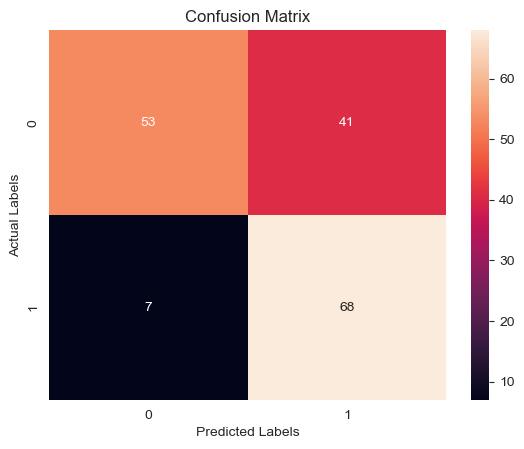

In [110]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
gnb_model = GaussianNB()
gnb_model.fit(X_train,Y_train)

print("Model-GaussianNB")
print("train score",gnb_model.score(X_train,Y_train))
print("test score",gnb_model.score(X_test,Y_test))

y_pred = gnb_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

# Suport Vector Machine - Classifier

model-Suport Vector Machine - kernel - linear -Classifier
Train Accuracy: 0.7644444444444445
Test Accuracy: 0.7455621301775148
              precision    recall  f1-score   support

           0       0.96      0.56      0.71        94
           1       0.64      0.97      0.77        75

    accuracy                           0.75       169
   macro avg       0.80      0.77      0.74       169
weighted avg       0.82      0.75      0.74       169

[[53 41]
 [ 2 73]]


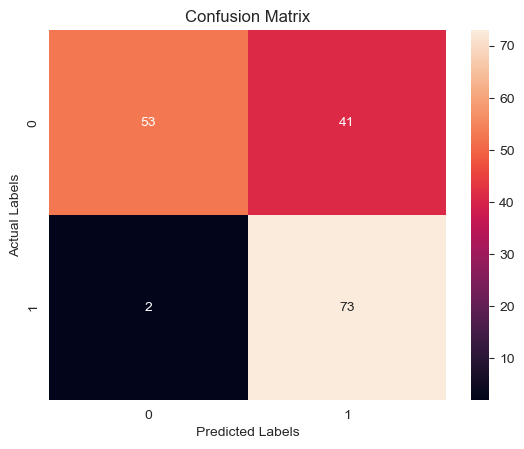

In [111]:
from sklearn.svm import SVC
# Initialize the SVM classifier
svm_linear_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_linear_classifier.fit(X_train, Y_train)
print("model-Suport Vector Machine - kernel - linear -Classifier")

y_pred = svm_linear_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_linear_classifier.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

model-Suport Vector Machine - Kernel -rbf - Classifier
Train Accuracy: 0.8177777777777778
Test Accuracy: 0.7455621301775148
              precision    recall  f1-score   support

           0       0.87      0.64      0.74        94
           1       0.66      0.88      0.75        75

    accuracy                           0.75       169
   macro avg       0.76      0.76      0.75       169
weighted avg       0.78      0.75      0.74       169

[[60 34]
 [ 9 66]]


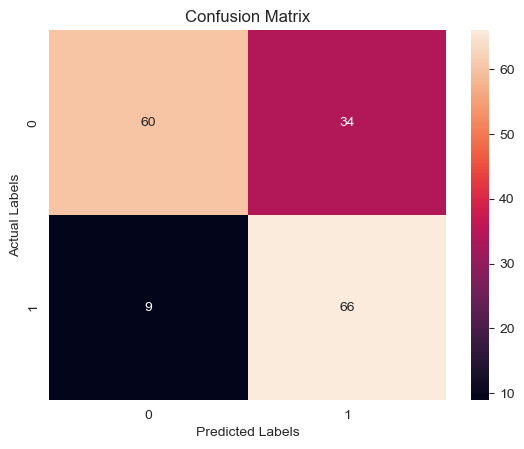

In [112]:
svm_rbf_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_rbf_classifier.fit(X_train, Y_train)
print("model-Suport Vector Machine - Kernel -rbf - Classifier")
y_pred = svm_rbf_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_rbf_classifier.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

model-Suport Vector Machine - Kernel -poly - Classifier
Train Accuracy: 0.8074074074074075
Test Accuracy: 0.7514792899408284
              precision    recall  f1-score   support

           0       0.91      0.62      0.73        94
           1       0.66      0.92      0.77        75

    accuracy                           0.75       169
   macro avg       0.78      0.77      0.75       169
weighted avg       0.80      0.75      0.75       169

[[58 36]
 [ 6 69]]


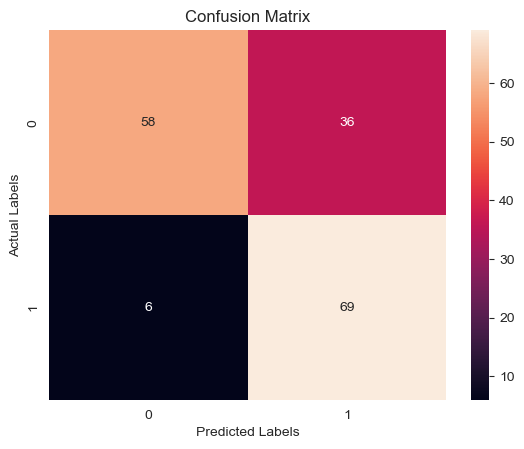

In [113]:
svm_poly_classifier = SVC(kernel='poly', random_state=42)

# Train the SVM classifier
svm_poly_classifier.fit(X_train, Y_train)
print("model-Suport Vector Machine - Kernel -poly - Classifier")

y_pred = svm_poly_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_poly_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## Decision Tree

Model-Decion Tree
train score: 0.802962962962963
test score: 0.7633136094674556
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        94
           1       0.73      0.73      0.73        75

    accuracy                           0.76       169
   macro avg       0.76      0.76      0.76       169
weighted avg       0.76      0.76      0.76       169

[[74 20]
 [20 55]]


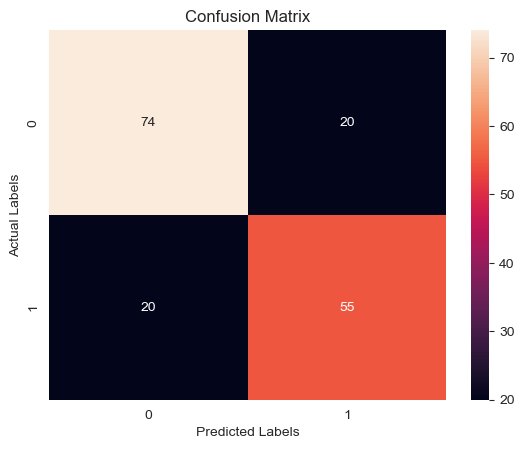

In [114]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=20,random_state=42)
dt_clf.fit(X_train, Y_train)
print("Model-Decion Tree")

accuracy=dt_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")

accuracy=dt_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

y_pred=dt_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## Radom Forest

Model- Random Forest Tree
train score: 0.8622222222222222
test score: 0.7337278106508875
              precision    recall  f1-score   support

           0       0.89      0.60      0.71        94
           1       0.64      0.91      0.75        75

    accuracy                           0.73       169
   macro avg       0.77      0.75      0.73       169
weighted avg       0.78      0.73      0.73       169

[[56 38]
 [ 7 68]]


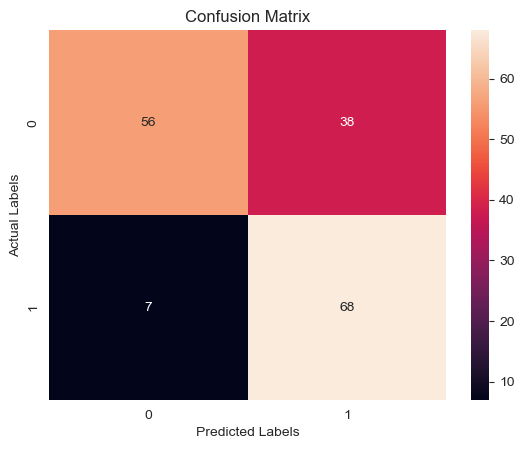

In [115]:
rf_clf= RandomForestClassifier(n_estimators = 1000, random_state = 42, max_leaf_nodes=20)
rf_clf.fit(X_train, Y_train)
print("Model- Random Forest Tree")

accuracy=rf_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")

accuracy=rf_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

y_pred=rf_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## AdaBoost 

C:\Users\91956\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model-AdaBoost
train score 0.7866666666666666
test score: 0.7100591715976331
              precision    recall  f1-score   support

           0       0.84      0.60      0.70        94
           1       0.63      0.85      0.72        75

    accuracy                           0.71       169
   macro avg       0.73      0.72      0.71       169
weighted avg       0.74      0.71      0.71       169

[[56 38]
 [11 64]]


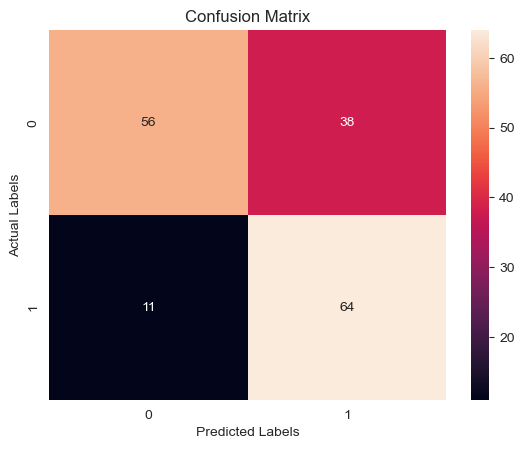

In [116]:

base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier( n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_clf.fit(X_train, Y_train)

print("Model-AdaBoost")
print("train score",adaboost_clf.score(X_train, Y_train))

# Predict on the test set
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"test score: {accuracy}")

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## GradientBoostingClassifier

model-Gradient Boosting Classifier
Train Accuracy: 0.7140740740740741
Test Accuracy: 0.6745562130177515
              precision    recall  f1-score   support

           0       0.84      0.60      0.70        94
           1       0.63      0.85      0.72        75

    accuracy                           0.71       169
   macro avg       0.73      0.72      0.71       169
weighted avg       0.74      0.71      0.71       169

[[56 38]
 [11 64]]


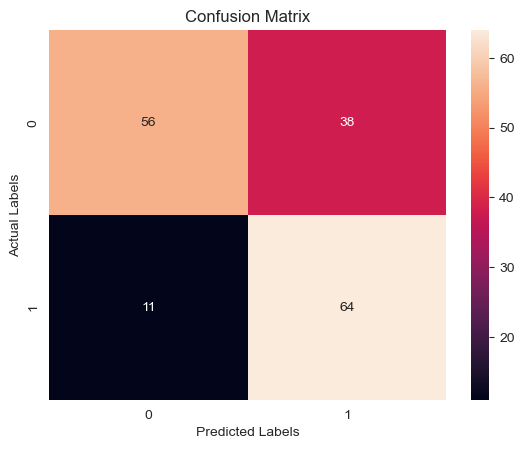

In [117]:
gdb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=1, random_state=42)
gdb_clf.fit(X_train, Y_train)
print("model-Gradient Boosting Classifier")

accuracy = gdb_clf.score(X_train, Y_train)
print("Train Accuracy:", accuracy)

accuracy = gdb_clf.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## XGBClassifier

model- XGB Classifier
Test Accuracy: 0.997037037037037
Test Accuracy: 0.7159763313609467
              precision    recall  f1-score   support

           0       0.77      0.70      0.73        94
           1       0.66      0.73      0.70        75

    accuracy                           0.72       169
   macro avg       0.72      0.72      0.71       169
weighted avg       0.72      0.72      0.72       169

[[66 28]
 [20 55]]


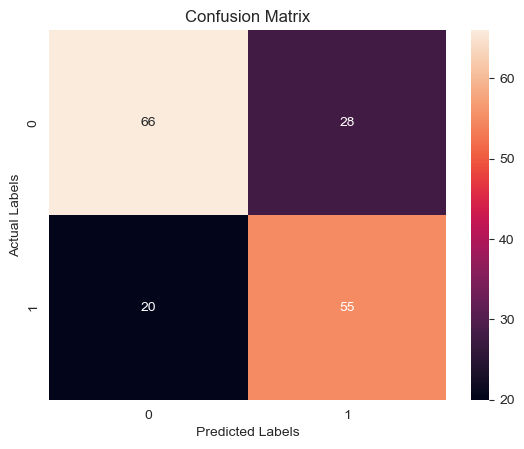

In [118]:
from xgboost import XGBClassifier
xgmodel = XGBClassifier()
xgmodel.fit(X_train, Y_train)


print("model- XGB Classifier")
# Make predictions on the test set
y_pred = xgmodel.predict(X_train)
accuracy = accuracy_score(Y_train, y_pred)
print("Test Accuracy:", accuracy)
# Evaluate the model

# Make predictions on the test set
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

$Observations$
1. Did the EDA 
2. Developed Models on Given dataset